In [66]:
import matplotlib.patches as patches
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df_quad = pd.read_csv("../utils/quadtree_10_1000.csv")
df_pred = pd.read_csv("../../data/results/baseline/geolocations_uniform.csv")
df_pred_classes = pd.read_csv("../../data/results/baseline/geolocations_uniform_classes.csv")
df_gt = pd.read_csv("../../data/gt/datasetInfoClean.csv")

In [68]:
print(df_gt[["latitude", "longitude"]].describe())

furthest_north_gt = df_gt.loc[df_gt["latitude"].idxmax()]
furthest_south_gt = df_gt.loc[df_gt["latitude"].idxmin()]
furthest_east_gt = df_gt.loc[df_gt["longitude"].idxmax()]
furthest_west_gt = df_gt.loc[df_gt["longitude"].idxmin()]

           latitude     longitude
count  12353.000000  12353.000000
mean      46.400361      8.921004
std        0.608220      2.001557
min       43.284000      5.285130
25%       45.927800      6.988710
50%       46.530800      7.984070
75%       46.668800     10.573000
max       47.995000     15.901726


In [69]:
df_pred["latitude_deg"] = df_pred["latitude_radians"] * 180 / 3.141592653589793
df_pred["longitude_deg"] = df_pred["longitude_radians"] * 180 / 3.141592653589793

print(df_pred[["latitude_deg", "longitude_deg"]].describe())

furthest_north_pred = df_pred.loc[df_pred["latitude_deg"].idxmax()]
furthest_south_pred = df_pred.loc[df_pred["latitude_deg"].idxmin()]
furthest_east_pred = df_pred.loc[df_pred["longitude_deg"].idxmax()]
furthest_west_pred = df_pred.loc[df_pred["longitude_deg"].idxmin()]

       latitude_deg  longitude_deg
count  12353.000000   12353.000000
mean      45.487782      10.216863
std        7.801336      20.330350
min      -42.805019    -149.547327
25%       45.904959       8.404300
50%       46.739583       9.627337
75%       46.960060      11.113886
max       78.268542     175.406428


In [70]:

def plot_min_max(ylim=None, xlim=None):
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.scatter(df_pred["longitude_deg"], df_pred["latitude_deg"], s=10, c='blue', alpha=0.3, label='Predictions')

    ax.scatter(df_gt["longitude"], df_gt["latitude"], s=10, c='green', alpha=0.3, label='Ground Truth')

    ax.scatter(furthest_north_gt["longitude"], furthest_north_gt["latitude"], c='darkgreen', marker='^', s=100, label='GT North')
    ax.scatter(furthest_south_gt["longitude"], furthest_south_gt["latitude"], c='darkgreen', marker='v', s=100, label='GT South')
    ax.scatter(furthest_east_gt["longitude"], furthest_east_gt["latitude"], c='darkgreen', marker='>', s=100, label='GT East')
    ax.scatter(furthest_west_gt["longitude"], furthest_west_gt["latitude"], c='darkgreen', marker='<', s=100, label='GT West')

    ax.scatter(furthest_north_pred["longitude_deg"], furthest_north_pred["latitude_deg"], c='darkblue', marker='^', s=100, label='Pred North')
    ax.scatter(furthest_south_pred["longitude_deg"], furthest_south_pred["latitude_deg"], c='darkblue', marker='v', s=100, label='Pred South')
    ax.scatter(furthest_east_pred["longitude_deg"], furthest_east_pred["latitude_deg"], c='darkblue', marker='>', s=100, label='Pred East')
    ax.scatter(furthest_west_pred["longitude_deg"], furthest_west_pred["latitude_deg"], c='darkblue', marker='<', s=100, label='Pred West')

    ax.set_title("Furthest North, South, East, and West Points (GT vs Prediction)")
    ax.set_xlabel("Longitude (deg)")
    ax.set_ylabel("Latitude (deg)")
    
    if ylim is not None:
        ax.set_ylim(ylim[0], ylim[1])
    if xlim is not None:
        ax.set_xlim(xlim[0], xlim[1])

    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

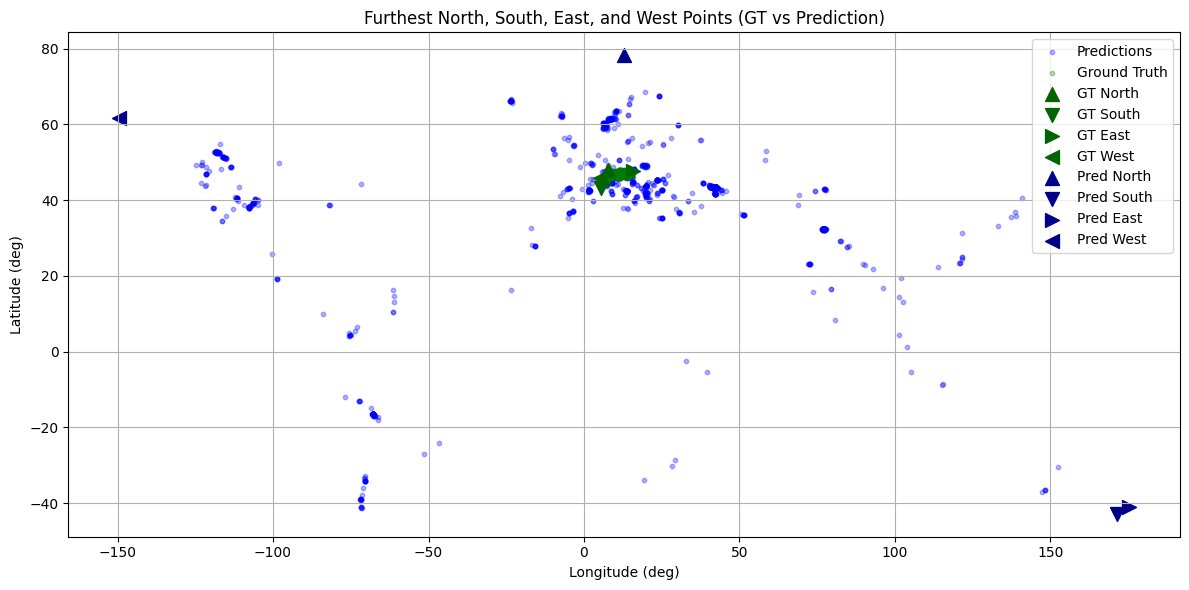

In [71]:
plot_min_max()

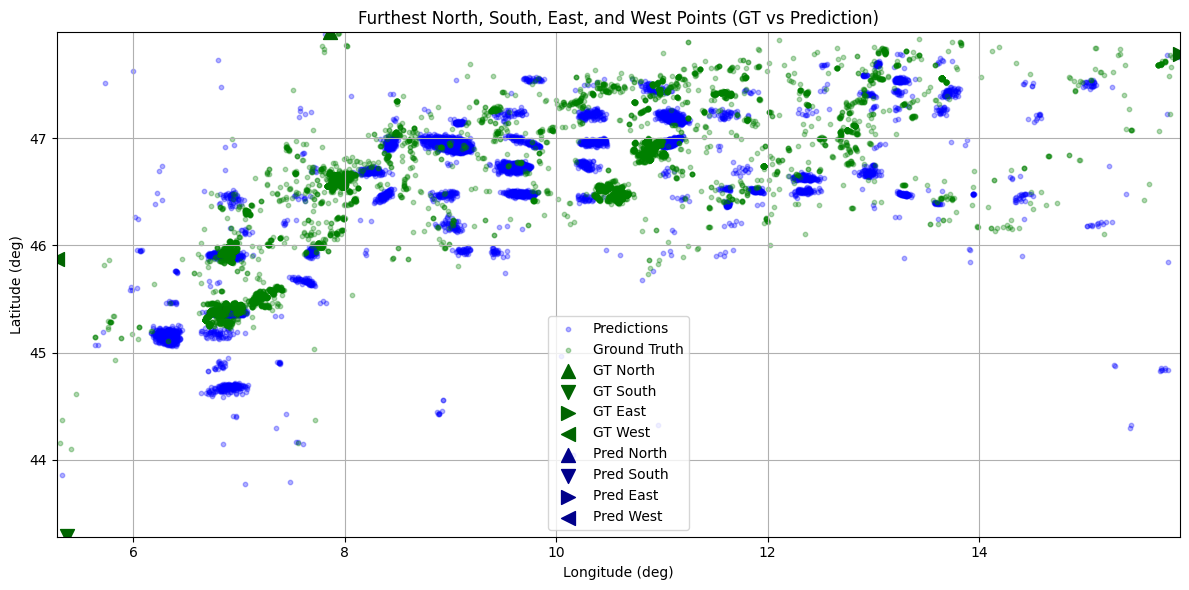

In [72]:
plot_min_max(ylim=[43.28, 47.99], xlim=[5.28, 15.90])

In [73]:
used_cell_ids_pred = df_pred_classes["cell_id"].unique()
print(len(used_cell_ids_pred))
used_cell_ids_pred

263


array([ 8338,  7267,  1689,  8979, 10589, 10816,  8838,  6915,  2719,
        8203,  8329,  7251,  8280,  8669,  8278,  8575, 10630,  9071,
       10949, 10602,  7463,  5905, 10280,  4831,  8863, 10957, 10762,
        7261,  7411,  8350,  8746,  8279,  8398,  6646, 10996, 10751,
        8369, 10950, 10646, 10690, 10728,  6579, 10665,  7408,  1856,
        8995,  8948,  8831, 10902, 10625,  8718,  8382, 10617,  8221,
       10038, 10591, 10598,  9665,  9851,  5082, 10892, 11163, 10725,
        8282,  8218,  9812,  8658,  1995,  8381,  8772,  8346,  8415,
        5265,  7265, 10661,  6505,   532, 10738,  6885,  9685, 11092,
        8999, 11067,  8722,  4824, 10250,  8682, 10230,  8839,  3266,
       10668,  6403,  8991,  6765, 11185,  2983,  6485,  7026,  6504,
        1333,  6842,  9729,  5332,  1950,  8795,  6779,   718, 10760,
       10605,  8723,  2982, 10260,  8436,  1252,  4943,  8347, 10757,
        8865, 10025, 10618,  5263, 10769,  2005,  8379, 10698,  9690,
        9652, 10597,

In [89]:
def assign_cell_ids(points_df, quad_df):
    points = points_df[["latitude", "longitude"]].to_numpy()
    mins = quad_df[["min_lat", "min_lon"]].to_numpy()
    maxs = quad_df[["max_lat", "max_lon"]].to_numpy()

    mask = (
        (points[:, None, 0] >= mins[None, :, 0]) & 
        (points[:, None, 0] <= maxs[None, :, 0]) &
        (points[:, None, 1] >= mins[None, :, 1]) & 
        (points[:, None, 1] <= maxs[None, :, 1])
    )

    cell_ids = mask.argmax(axis=1)
    
    unmatched = ~mask.any(axis=1)
    if unmatched.any():
        print(f"Warning: {unmatched.sum()} points did not match any quadtree cell.")
        cell_ids[unmatched] = -1 

    points_df["cell_id"] = cell_ids
    return points_df


df_gt = assign_cell_ids(df_gt, df_quad)


In [103]:
used_cell_ids_gt = df_gt["cell_id"].unique()
print(len(used_cell_ids_gt))
df_gt.to_csv("../../data/results/baseline/geolocations_uniform_classes_quadtree.csv")
used_cell_ids_gt

155


array([8377, 8382, 8418, 8383, 8387, 8386, 8398, 8389, 8388, 8353, 8351,
       8349, 8347, 8407, 8391, 8397, 8348, 8403, 8558, 8424, 8562, 8421,
       8415, 8868, 8385, 8731, 8728, 8417, 8734, 8841, 8425, 8409, 8831,
       8542, 8400, 8346, 8865, 8843, 8561, 8716, 8729, 8853, 8414, 8352,
       8717, 8412, 8840, 8839, 8828, 8733, 8730, 8564, 8750, 8420, 8422,
       8328, 8323, 8408, 8338, 8526, 8702, 8402, 8394, 8753, 8867, 8837,
       8557, 8684, 8556, 8416, 8833, 8406, 8711, 8521, 8380, 8381, 8712,
       8834, 8737, 8563, 8741, 8727, 8736, 8404, 8836, 8752, 8376, 8747,
       8423, 8838, 8535, 8392, 8829, 8723, 6821, 8674, 8852, 8685, 8378,
       8849, 8740, 8845, 8726, 8721, 6769, 8265, 8554, 6819, 8277, 8410,
       8329, 6735, 8258, 6770, 8537, 8718, 8275, 8844, 8687, 8379, 8572,
       8832, 8413, 8719, 8830, 6704, 8369, 8350, 8724, 6758, 6765, 6756,
       8722, 8560, 8390, 8411, 8419, 8550, 8528, 8866, 6780, 8720, 8393,
       8384, 8534, 8405, 8842, 8732, 8555, 8751, 87

155


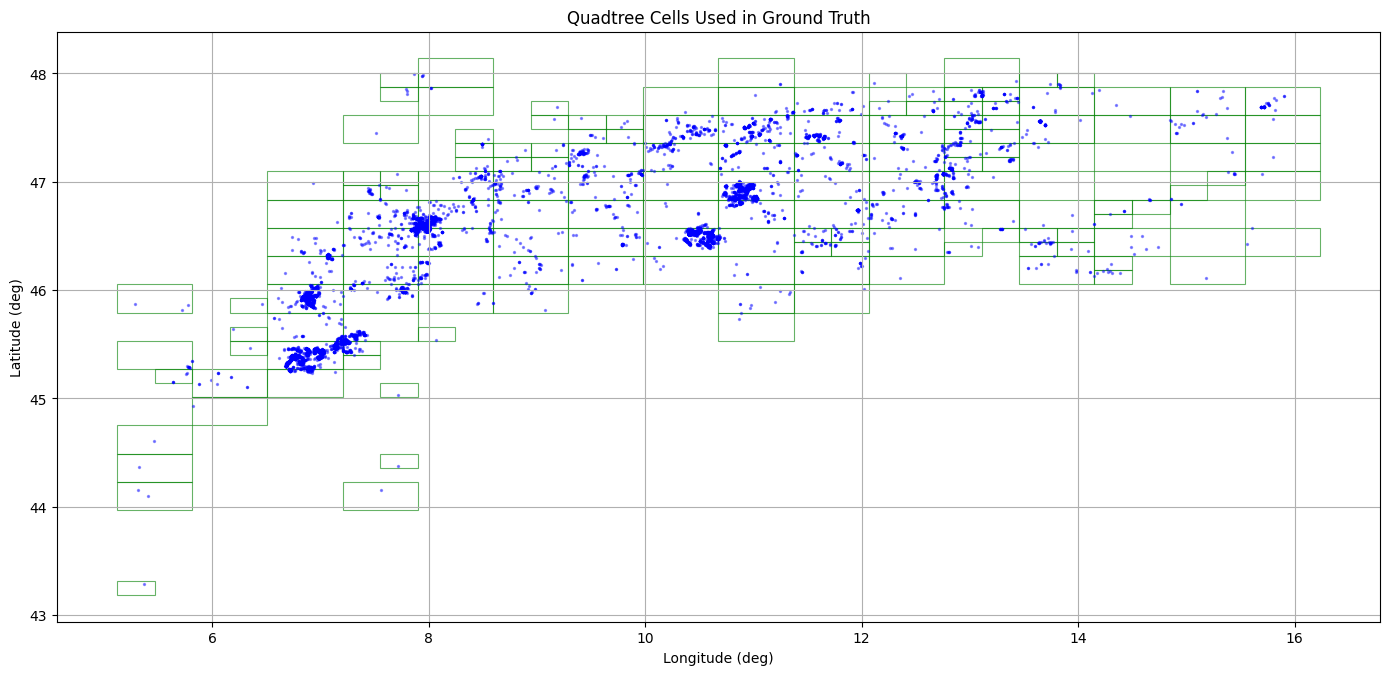

In [91]:
df_gt_boxes = df_quad[df_quad["cluster_id"].isin(used_cell_ids_gt)]

print(len(df_gt_boxes))

fig, ax = plt.subplots(figsize=(14, 8))

for _, row in df_gt_boxes.iterrows():
    rect = patches.Rectangle(
        (row["min_lon"], row["min_lat"]),
        row["max_lon"] - row["min_lon"],
        row["max_lat"] - row["min_lat"],
        linewidth=0.8,
        edgecolor='green',
        facecolor='none',
        alpha=0.6
    )
    ax.add_patch(rect)

ax.scatter(df_gt["longitude"], df_gt["latitude"], s=2, c='blue', alpha=0.4)

ax.set_title("Quadtree Cells Used in Ground Truth")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.set_aspect("equal")
plt.grid(True)
plt.tight_layout()
plt.show()

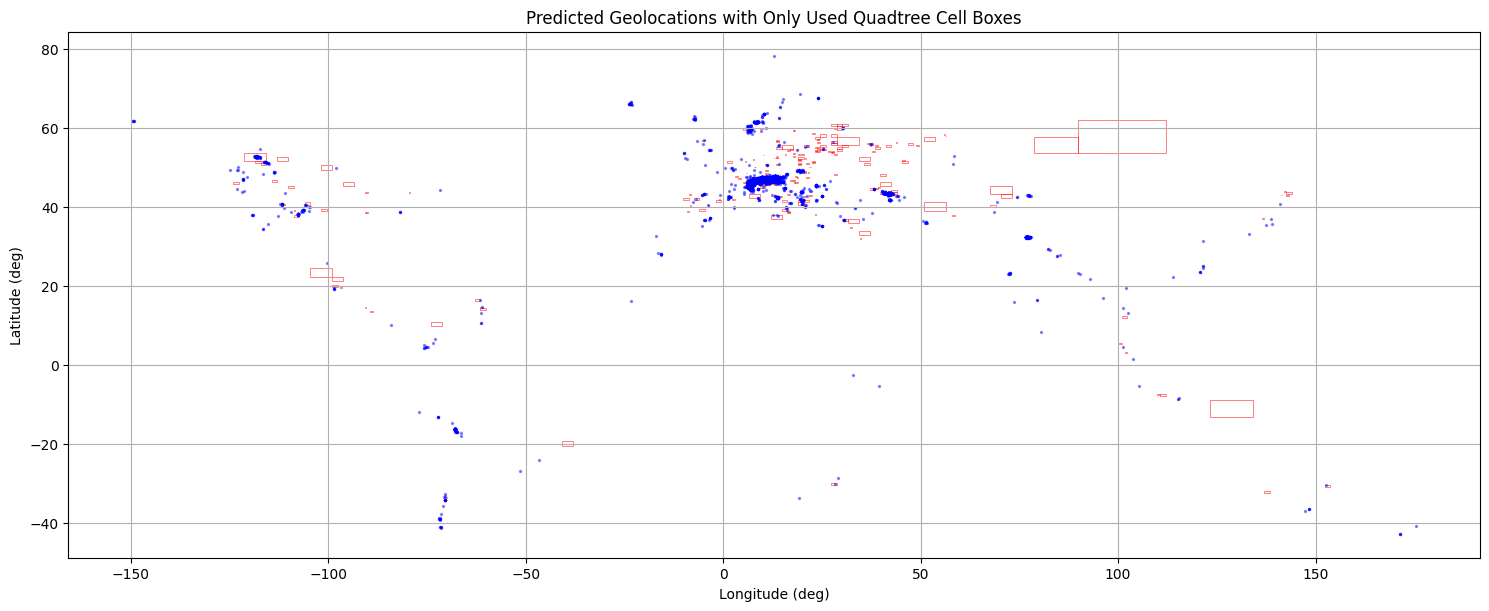

In [77]:
df_pred_boxes = df_quad[df_quad["cluster_id"].isin(used_cell_ids_pred)]

fig, ax = plt.subplots(figsize=(15, 14))

for _, row in df_pred_boxes.iterrows():
    rect = patches.Rectangle(
        (row["min_lon"], row["min_lat"]),
        row["max_lon"] - row["min_lon"],
        row["max_lat"] - row["min_lat"],
        linewidth=0.7,
        edgecolor='red',
        facecolor='none',
        alpha=0.5
    )
    ax.add_patch(rect)

ax.scatter(df_pred["longitude_deg"], df_pred["latitude_deg"], s=2, c='blue', alpha=0.4)

ax.set_title("Predicted Geolocations with Only Used Quadtree Cell Boxes")
ax.set_xlabel("Longitude (deg)")
ax.set_ylabel("Latitude (deg)")
ax.set_aspect("equal")
plt.grid(True)
plt.tight_layout()
plt.show()


In [101]:
df_train = pd.read_csv("../../data/gt/train.csv")
df_test = pd.read_csv("../../data/gt/test.csv")
df_val = pd.read_csv("../../data/gt/val.csv")

In [102]:
df_train.rename(columns={"latitude": "longitude", "longitude": "latitude"}, inplace=True)
df_test.rename(columns={"latitude": "longitude", "longitude": "latitude"}, inplace=True)
df_val.rename(columns={"latitude": "longitude", "longitude": "latitude"}, inplace=True)

df_train = assign_cell_ids(df_train, df_quad)
df_test = assign_cell_ids(df_test, df_quad)
df_val = assign_cell_ids(df_val, df_quad)

df_train.to_csv("../../data/gt/train_with_cells.csv", index=False)
df_test.to_csv("../../data/gt/test_with_cells.csv", index=False)
df_val.to_csv("../../data/gt/val_with_cells.csv", index=False)